# New York City Taxi Data Exploration

This is one of the kaggle competitions.

## Competition Description ([from kaggle web site]((https://www.kaggle.com/c/nyc-taxi-trip-duration)))


In this competition, Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

Longtime Kagglers will recognize that this competition objective is similar to the ECML/PKDD trip time challenge we hosted in 2015. But, this challenge comes with a twist. Instead of awarding prizes to the top finishers on the leaderboard, this playground competition was created to reward collaboration and collective learning.

We are encouraging you (with cash prizes!) to publish additional training data that other participants can use for their predictions. We also have designated bi-weekly and final prizes to reward authors of kernels that are particularly insightful or valuable to the community.

## Data
The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

### File descriptions

train.csv - the training set (contains 1458644 trip records)  
test.csv - the testing set (contains 625134 trip records)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

##  01. Load Files

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

### File check...!!

In [3]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [4]:
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [5]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [6]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

Of course, No `dropoff_datetime` and `trip_duration` for test set.

In [8]:
train_pickup = pd.read_csv('./input/train_pickup_save.csv')
train_dropoff = pd.read_csv('./input/train_dropoff_save.csv')

test_pickup = pd.read_csv('./input/test_pickup_save.csv')
test_dropoff = pd.read_csv('./input/test_dropoff_save.csv')

## 02. Manhattan or Not?

Text(0.5,1,'Dropoff Location (Train)')

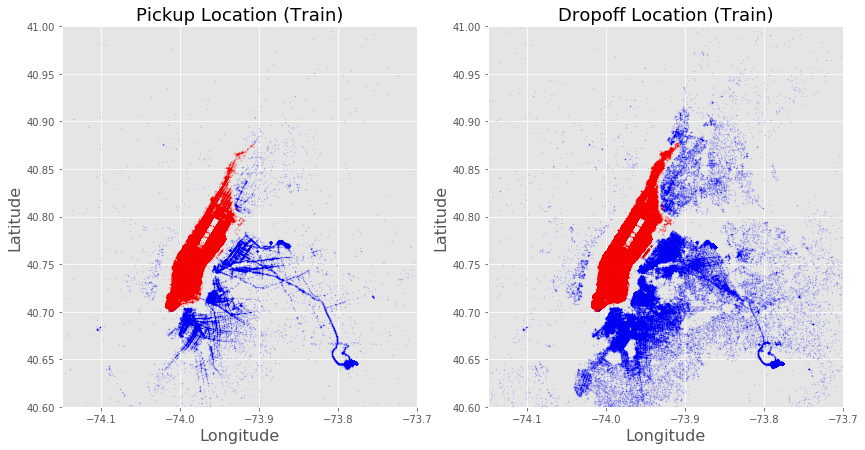

In [9]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(train.pickup_longitude[train_pickup.pickup_manhattan=='Manhattan'],
            train.pickup_latitude[train_pickup.pickup_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(train.pickup_longitude[train_pickup.pickup_manhattan=='Non-Manhattan'],
            train.pickup_latitude[train_pickup.pickup_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location (Train)',fontsize=18)

ax1 = fig.add_subplot(122)
ax1.scatter(train.dropoff_longitude[train_dropoff.dropoff_manhattan=='Manhattan'],
            train.dropoff_latitude[train_dropoff.dropoff_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(train.dropoff_longitude[train_dropoff.dropoff_manhattan=='Non-Manhattan'],
            train.dropoff_latitude[train_dropoff.dropoff_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location (Train)',fontsize=18)

Text(0.5,1,'Dropoff Location')

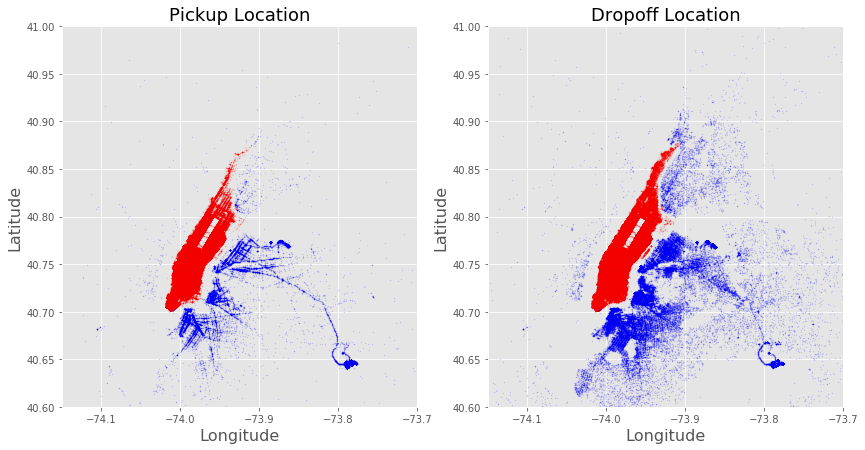

In [10]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(test.pickup_longitude[test_pickup.pickup_manhattan=='Manhattan'],
            test.pickup_latitude[test_pickup.pickup_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(test.pickup_longitude[test_pickup.pickup_manhattan=='Non-Manhattan'],
            test.pickup_latitude[test_pickup.pickup_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax1 = fig.add_subplot(122)
ax1.scatter(test.dropoff_longitude[test_dropoff.dropoff_manhattan=='Manhattan'],
            test.dropoff_latitude[test_dropoff.dropoff_manhattan=='Manhattan'],
            s=1,alpha=0.1,color='red')
ax1.scatter(test.dropoff_longitude[test_dropoff.dropoff_manhattan=='Non-Manhattan'],
            test.dropoff_latitude[test_dropoff.dropoff_manhattan=='Non-Manhattan'],
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location',fontsize=18)

## 03. Correlation Function

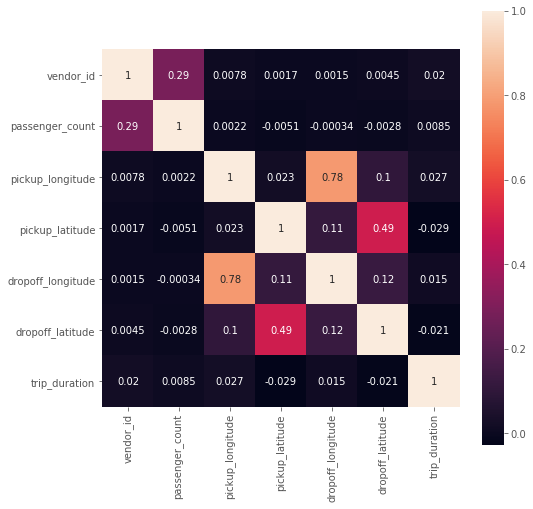

In [11]:
numtrain = train.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=1,square=True,annot=True)

The highest correlation coefficient is between pickup_longitude and dropoff_longitude. This is higher than that of between pickup_langitude and dropoff_latitude, 0.49 because Manhattan is elongated in the North-South direction. This means that there is more variation in the latitude range and less variation of the longitude. 

Otherwise, most of coefficient is really very low related to `trip_duration`, which means we either have to find more sources of data or be creative in our feature engineering.

## 04. miles

In [13]:
train['new_pickup'] = [(a,b) for a, b in zip(train.pickup_latitude,train.pickup_longitude)]
train['new_dropoff'] = [(a,b) for a, b in zip(train.dropoff_latitude,train.dropoff_longitude)]

from geopy.distance import great_circle
train['miles'] = [great_circle(a,b).miles for a, b in zip(train.new_pickup,train.new_dropoff)]

test['new_pickup'] = [(a,b) for a, b in zip(test.pickup_latitude,test.pickup_longitude)]
test['new_dropoff'] = [(a,b) for a, b in zip(test.dropoff_latitude,test.dropoff_longitude)]

test['miles'] = [great_circle(a,b).miles for a, b in zip(test.new_pickup,test.new_dropoff)]

Obviously, `miles` are not real distance because taxies cannot drive the shortest distance between two points. However, here I just simplify the driving distance as the distance between two locations.

In [14]:
train["velocity"] = train.miles/(train.trip_duration/(60*60))

In [15]:
train = train[((train.trip_duration < 10000) & (train.trip_duration >10))]

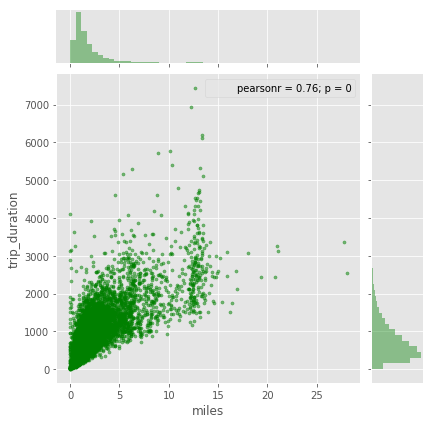

In [16]:
sns.jointplot('miles','trip_duration',data=train[:10000],s=10,alpha=0.5,color='green')

It is obvious that `miles` is correlated with `trip_duration`, but it seems to be skewed. So, I can plot with log scale.

Text(336.971,0.5,'log (trip_duration)')

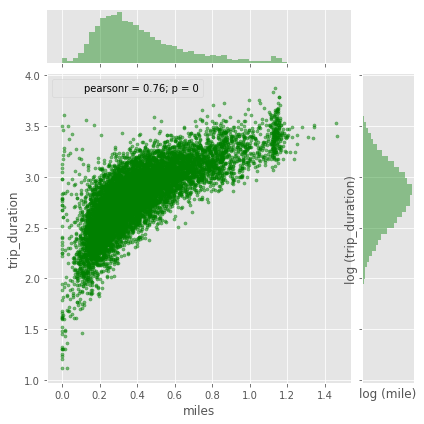

In [17]:
#plt.figure(figsize=(50,30))
sns.jointplot(np.log10(train["miles"][:10000]+1),np.log10(train["trip_duration"][:10000]+1),s=10,alpha=0.5,color='green')
plt.xlabel('log (mile)')
plt.ylabel('log (trip_duration)')

### Pickup Location & Dropoff Location

Text(0,0.5,'Latitude')

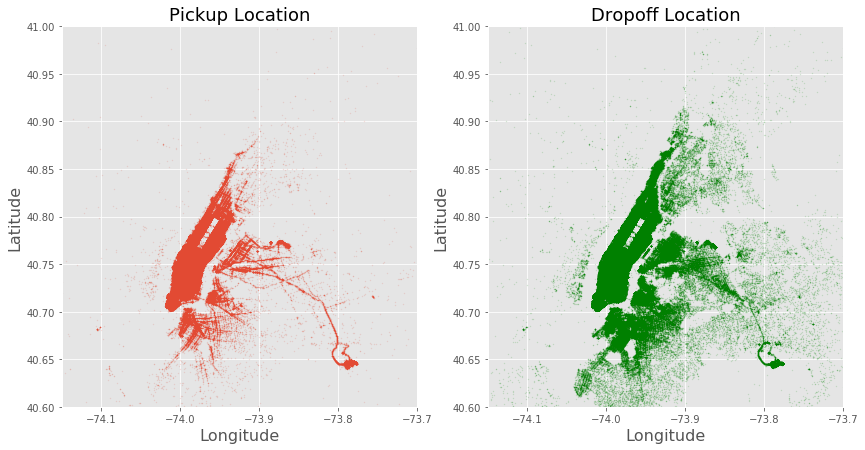

In [18]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(train.pickup_longitude,train.pickup_latitude,s=1,alpha=0.1)
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)
ax2 = fig.add_subplot(122)
ax2.scatter(train.dropoff_longitude,train.dropoff_latitude,s=1,color='green',alpha=0.1)
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

I can check some of the facts:

* Most of pickup location is from Manhattan.
* Some of pickup location is from either Brookline or Airport (JFK or LGA)
* Dropoff Location is more distributed in not only Manhattan but Brookline or Quincy, etc.

## 05. DateTime

In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [20]:
train.pickup_datetime.dt

In [21]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_hour'] = train.pickup_datetime.dt.hour
train['pickup_week'] = train.pickup_datetime.dt.weekday
train['pickup_month'] = train.pickup_datetime.dt.month
train['pickup_day'] = train.pickup_datetime.dt.day

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_hour'] = test.pickup_datetime.dt.hour
test['pickup_week'] = test.pickup_datetime.dt.weekday
test['pickup_month'] = test.pickup_datetime.dt.month
test['pickup_day'] = test.pickup_datetime.dt.day

In [27]:
import calendar
#list(calendar.day_name)
train['pickup_week'] = train['pickup_week'].apply(lambda x: calendar.day_name[x])
test['pickup_week'] = test['pickup_week'].apply(lambda x: calendar.day_name[x])

In [23]:
train['pickup_hour'] = train['pickup_hour'].apply(int)
test['pickup_hour'] = test['pickup_hour'].apply(int)

train['pickup_day'] = train['pickup_day'].apply(int)
test['pickup_day'] = test['pickup_day'].apply(int)

train['pickup_month'] = train['pickup_month'].apply(int)
test['pickup_month'] = test['pickup_month'].apply(int)

Text(0,0.5,'mean(Miles)')

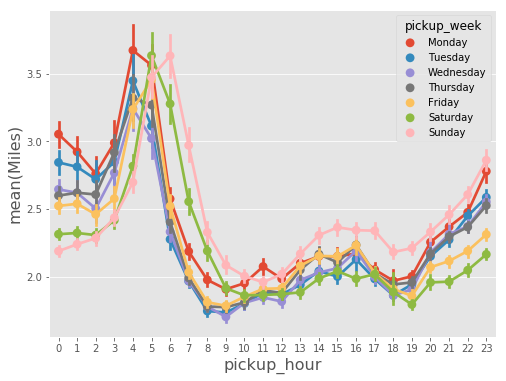

In [28]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='miles',data=train,kind='point',hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(Miles)',fontsize=16)

Text(0,0.5,'mean(trip_duration)')

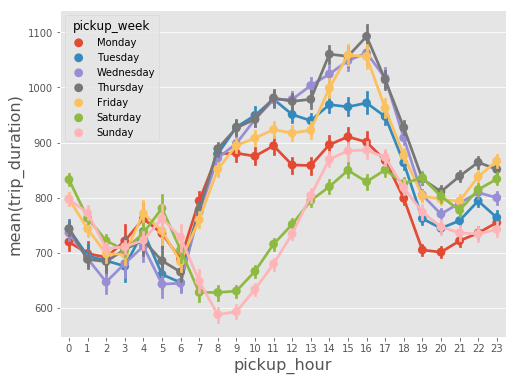

In [29]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Text(0,0.5,'mean(miles)')

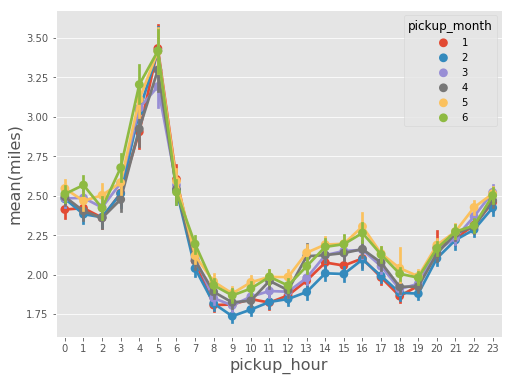

In [30]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='miles',data=train,kind='point',hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(miles)',fontsize=16)

Text(0,0.5,'mean(trip_duration)')

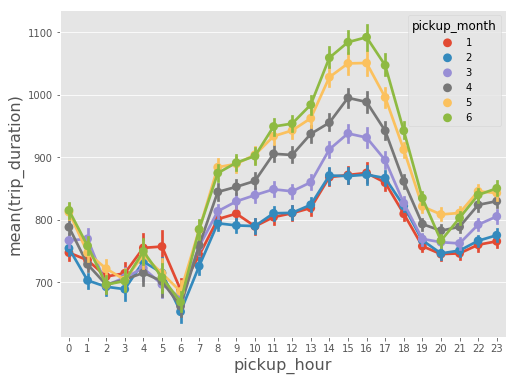

In [31]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

It is interesting that the relation with `trip_duration` and `pickup_hour` seems to change with different months in the day time (9am-7pm). 

### why are there higher pick during the warmer season daytime? Is that because of more Taxi ride or?

In [32]:
weekcount = train.groupby(['pickup_hour','pickup_week'],as_index=False).count()[['pickup_hour','pickup_week','id']]
monthcount = train.groupby(['pickup_hour','pickup_month'],as_index=False).count()[['pickup_hour','pickup_month','id']]

Text(0,0.5,'Count')

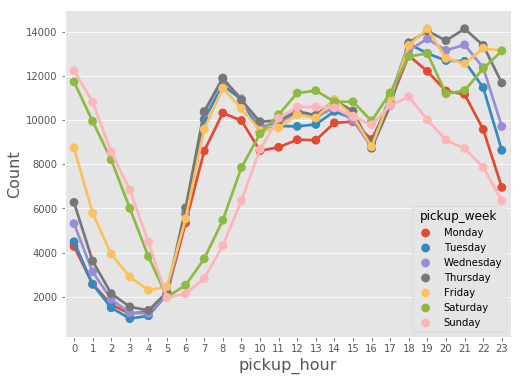

In [33]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='id',data=weekcount,hue='pickup_week',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('Count',fontsize=16)

Text(0,0.5,'Count')

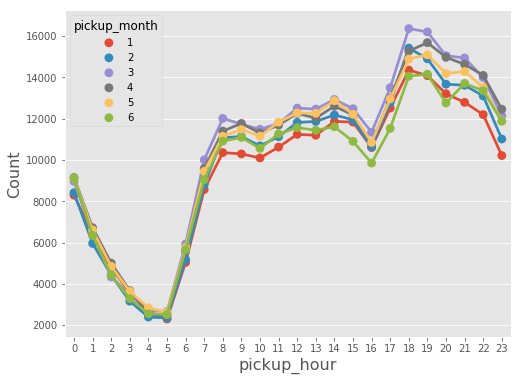

In [34]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='id',data=monthcount,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('Count',fontsize=16)

No obvious trend showing an increase in the number of rides as you go from January to June, which means the increased trip duration in later months is not due to an increases in the number of rides.  However, there could be more traffice jam due to many other cars in later months. In conclusion, there are either many more local people around or many tourists in New York City during the warmer seasons, especially day time.

## 06. Features

### store and fwd flag

Text(0,0.5,'Number')

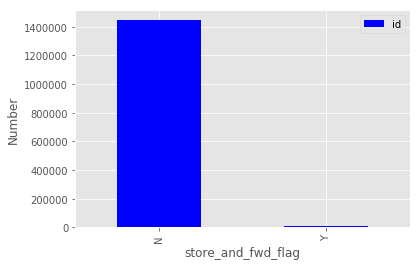

In [35]:
pd.DataFrame(train.groupby(['store_and_fwd_flag']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

### vendor_id

Text(0,0.5,'Number')

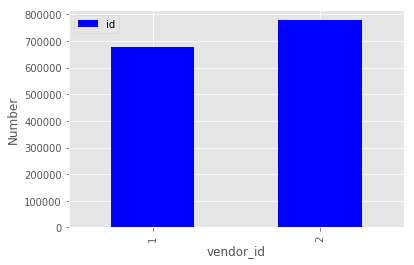

In [36]:
pd.DataFrame(train.groupby(['vendor_id']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

### passenger_count

Text(0,0.5,'Number')

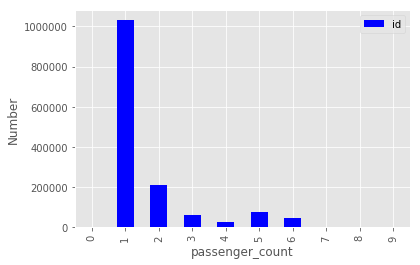

In [37]:
pd.DataFrame(train.groupby(['passenger_count']).count()['id']).plot(kind='bar',color='blue')
plt.ylabel('Number')

Text(0,0.5,'mean(trip_duration)')

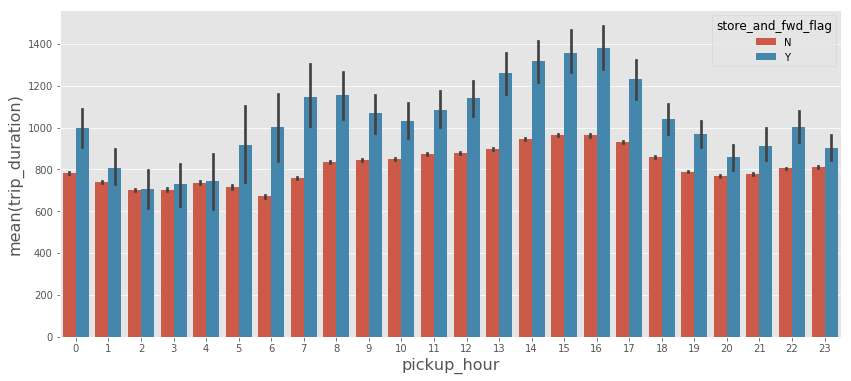

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=train,hue='store_and_fwd_flag')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Text(0,0.5,'mean(trip_duration)')

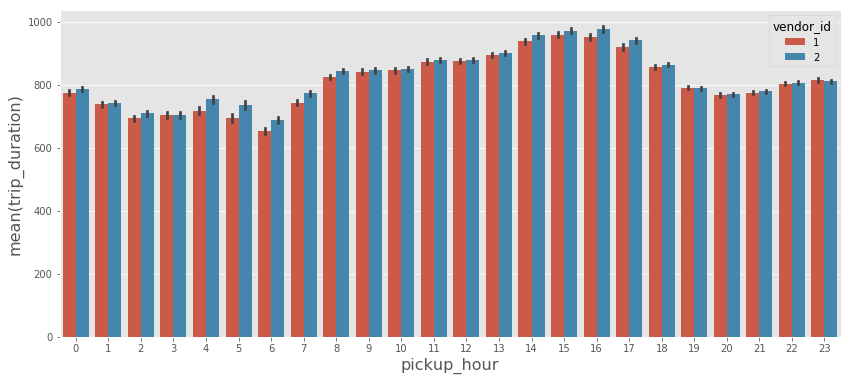

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=train,hue='vendor_id')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Here, I just want to simplify `passenger_count` as either one or more than one person. So,

In [40]:
#train['passenger_count'] = train.passenger_count.apply(lambda x:2 if x>=2 else 1)
#test['passenger_count'] = test.passenger_count.apply(lambda x:2 if x>=2 else 1)

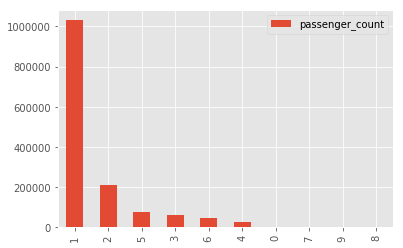

In [41]:
pd.DataFrame(train['passenger_count'].value_counts()).plot(kind='bar')

Text(0,0.5,'mean(trip_duration)')

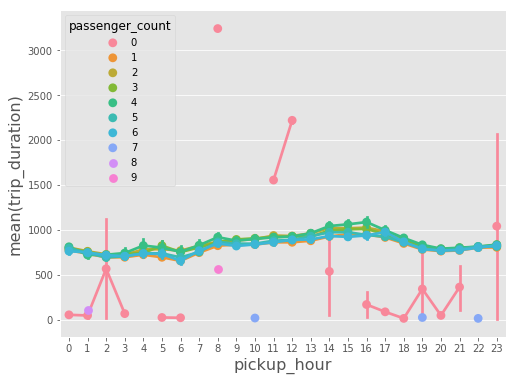

In [42]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=train,hue='passenger_count')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Here, passenger_count = 2 means that the number of passenger is more than 1.

In [43]:
train["pickup_manhattan"]=train_pickup["pickup_manhattan"].copy()
train["dropoff_manhattan"]=train_dropoff["dropoff_manhattan"].copy()

test["pickup_manhattan"]=test_pickup["pickup_manhattan"].copy()
test["dropoff_manhattan"]=test_dropoff["dropoff_manhattan"].copy()

In [44]:
train['pickup_manhattan'] = train.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)
test['pickup_manhattan'] = test.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)

In [45]:
train['dropoff_manhattan'] = train.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)
test['dropoff_manhattan'] = test.pickup_manhattan.apply(lambda x:1 if x=="Manhattan" else 0)

In [46]:
train['store_and_fwd_flag'] = train.pickup_manhattan.apply(lambda x:1 if x=="Y" else 0)
test['store_and_fwd_flag'] = test.pickup_manhattan.apply(lambda x:1 if x=="Y" else 0)

In [47]:
from sklearn.cluster import KMeans
train_pickup_loc = pd.DataFrame()
train_pickup_loc['longitude'] = train['pickup_longitude']
train_pickup_loc['latitude'] = train['pickup_latitude']

test_pickup_loc = pd.DataFrame()
test_pickup_loc['longitude'] = test['pickup_longitude']
test_pickup_loc['latitude'] = test['pickup_latitude']

train_dropoff_loc = pd.DataFrame()
train_dropoff_loc['longitude'] = train['dropoff_longitude']
train_dropoff_loc['latitude'] = train['dropoff_latitude']

test_dropoff_loc = pd.DataFrame()
test_dropoff_loc['longitude'] = test['dropoff_longitude']
test_dropoff_loc['latitude'] = test['dropoff_latitude']

both_loc = pd.concat([train_pickup_loc,test_pickup_loc,train_dropoff_loc,test_dropoff_loc],axis=0)
kmeans = KMeans(n_clusters=15, random_state=0).fit(both_loc)


In [48]:
len_train = len(train)
len_test = len(test)

In [49]:
train['pickup_label'] = kmeans.labels_[:len_train]
test['pickup_label'] = kmeans.labels_[len_train:len_train+len_test]
train['dropoff_label'] = kmeans.labels_[len_train+len_test:len_train*2+len_test]
test['dropoff_label'] = kmeans.labels_[len_train*2+len_test:]

## 07. Data Cleaning for Model

In [50]:
train_cleaning = train.drop(['id','pickup_datetime','dropoff_datetime', 'new_pickup','new_dropoff','velocity','trip_duration'],axis=1)
test_cleaning = test.drop(['id','pickup_datetime','new_pickup','new_dropoff'],axis=1)

In [51]:
print(train_cleaning.shape)
print(test_cleaning.shape)

(1454355, 16)
(625134, 16)


In [52]:
str_columns = ['pickup_hour','pickup_month','vendor_id','passenger_count']
for i in str_columns:
    train_cleaning[i]=train_cleaning[i].apply(str)
    test_cleaning[i]=test_cleaning[i].apply(str)

In [53]:
numerical = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_cleaning[numerical] = scaler.fit_transform(train_cleaning[numerical])
test_cleaning[numerical] = scaler.fit_transform(test_cleaning[numerical])

In [54]:
final_train = pd.get_dummies(train_cleaning)
final_test = pd.get_dummies(test_cleaning)

In [56]:
X=final_train
y=train["trip_duration"]
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=.33)

/Users/Hanriver0618/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred = model_lr.predict(X_test)
model_lr.score(X_train, Y_train)

0.53427564866222865

## Conclusion

The accuracy of the Linear Regression Model is around 53%, which is Not good. We need to use a more effective machine learning algorithm for this problem, such as Xgboost.